### 步驟一
#### 首先先設定Up moves/ Down moves
#### Up Move :      `若當日報酬大於0則取該報酬`  `若當日報酬小於0則取0`
#### Down Move : `若當日報酬小於0則取絕對值之報酬`  `若當日報酬小於0則取0`

### 步驟二
#### 使用指數移動平均法, 但是其factor 為特別選定的 where
#### $$\alpha= \frac{1}{\alpha}$$

### 步驟三
#### 計算RS = $$ \frac{Average UpMove} {Average DownMove} $$
#### 計算RSI = $$ 100-\frac{100}{1+Rs} $$
#### 參考資料 `https://www.macroption.com/rsi-calcul...`

In [2]:
stock = stock.Symbol.to_list()
stock

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CZR',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG

In [3]:
stock = [i.replace('.','-') for i in stock]
stock

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF-B',
 'CHRW',
 'COG',
 'CDNS',
 'CZR',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG

In [5]:
def RSIcalc(asset):
    df = yf.download(asset , start ="2011-01-01")
    df['MA200'] =  df['Adj Close'].rolling(window=200).mean()
    df['price change'] = df ['Adj Close'].pct_change()
    df['Upmove'] = df['price change'].apply(lambda x :x if x > 0 else 0)
    df['Downmove'] = df['price change'].apply(lambda x : abs(x) if x < 0 else 0)
    df['avg Up'] =df['Upmove'].ewm(span=19).mean() 
    df['avg Down'] =df['Downmove'].ewm(span=19).mean() 
    df = df.dropna()
    df['RS'] = df['avg Up']/df['avg Down']
    df['RSI'] = df['RS'].apply(lambda x:100-(100/(x+1)))
    df.loc[(df['Adj Close'] > df['MA200']) &(df['RSI'] <30),'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MA200']) |(df['RSI'] >30),'Buy'] = 'NO'
    return df 
RSIcalc(stock[0])

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,Downmove,avg Up,avg Down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2011-10-14,78.940002,79.230003,78.120003,78.889999,60.409805,2840800,67.103449,0.014011,0.014011,0.000000,0.011144,0.006978,1.596943,61.493185,NO
2011-10-17,78.629997,79.050003,75.660004,75.879997,58.104897,4359500,67.069641,-0.038155,0.000000,0.038155,0.010029,0.010096,0.993422,49.835013,NO
2011-10-18,76.180000,79.150002,75.709999,78.360001,60.003960,4167200,67.043486,0.032683,0.032683,0.000000,0.012295,0.009086,1.353122,57.503273,NO
2011-10-19,78.260002,78.860001,77.269997,77.699997,59.498554,3865000,67.015254,-0.008423,0.000000,0.008423,0.011065,0.009020,1.226767,55.091845,NO
2011-10-20,77.769997,79.059998,77.110001,78.680000,60.248985,4087300,66.990775,0.012613,0.012613,0.000000,0.011220,0.008118,1.382134,58.020832,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-14,204.000000,205.119995,203.009995,204.380005,202.887009,1475400,172.669937,0.004769,0.004769,0.000000,0.006889,0.004711,1.462194,59.385824,NO
2021-05-17,204.600006,205.350006,203.690002,205.110001,203.611664,1532700,172.952243,0.003572,0.003572,0.000000,0.006557,0.004240,1.546430,60.729342,NO
2021-05-18,204.990005,205.179993,202.809998,203.029999,201.546860,1771800,173.232204,-0.010141,0.000000,0.010141,0.005901,0.004830,1.221762,54.990670,NO


In [6]:
def getSignals(df):
    Buying_dates = []
    Selling_dates  = []
    
    for i in range(len(df)-11):
        if "Yes" in df['Buy'].iloc[i]:
            Buying_dates.append(df.iloc[i+1].name)
            for j in range(1, 11):
                if df["RSI"].iloc[i + j] >40:
                    Selling_dates.append(df.iloc[i+j+1].name)
                    break     
                elif j == 10:
                    Selling_dates.append(df.iloc[i+j+1].name)
    return Buying_dates, Selling_dates

In [7]:
frame = RSIcalc(stock[0])
buy, sell = getSignals(frame)

[*********************100%***********************]  1 of 1 completed


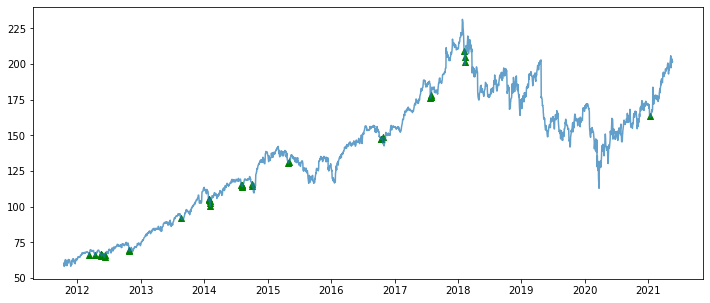

In [8]:
plt.figure(figsize=(12,5))
plt.scatter(frame.loc[buy].index,frame.loc[buy]['Adj Close'], marker= '^', c='g')
plt.plot(frame["Adj Close"],alpha = 0.7);

In [9]:
Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values

In [10]:
Profits

array([ 0.01841858,  0.01323802, -0.0115183 , -0.01105814,  0.00212315,
        0.01287556,  0.03632401,  0.02847867,  0.01033357,  0.01558087,
        0.01012236, -0.00346098,  0.00108178, -0.00407378,  0.02345979,
        0.01052883,  0.02759942,  0.00556546,  0.00556546,  0.01286469,
        0.0062834 ,  0.01170129,  0.01861865,  0.01306246,  0.0130085 ,
        0.01320242, -0.00076654,  0.00355307, -0.01841872,  0.01366927,
        0.02033747,  0.01195283,  0.01595001,  0.00852711,  0.02154845,
        0.00861573,  0.01892706])

In [11]:
wins = [i for i in Profits if i>0]
len(wins)/len(Profits)

0.8378378378378378

In [12]:
len(Profits)

37

In [ ]:
matrixsignals = []
martixprofits = []

In [ ]:
for i in range(len(stock)):
    frame = RSIcalc(stock[i ])
    buy, sell =getSignals(frame)
    Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values
    matrixsignals.append(buy)
    martixprofits.append(Profits)

In [ ]:
martixprofits.head()